In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
#from wordcloud import WordCloud
from textblob import TextBlob
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.impute import KNNImputer

from numpy.linalg import norm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.compose import ColumnTransformer


In [4]:
df = pd.read_csv("C:/Users/hmq4/OneDrive/Desktop/Data Science- Misk/chrome/Misk_DSI_Capstone_Project/final_df.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4239 entries, 0 to 4238
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              4239 non-null   object
 1   Price             4239 non-null   int64 
 2   Description       4239 non-null   object
 3   Rate              4239 non-null   object
 4   Rating_count      4239 non-null   object
 5   image             4239 non-null   object
 6   Brand             4239 non-null   object
 7   Gender            4239 non-null   object
 8   Product_Type      4239 non-null   object
 9   Character_x       4239 non-null   object
 10  Fragrance_Family  4239 non-null   object
 11  Size              4239 non-null   object
 12  Year              4239 non-null   int64 
 13  Ingredients       4239 non-null   object
 14  Concentration     4239 non-null   object
 15  Top_note          4239 non-null   object
 16  Middle_note       4239 non-null   object
 17  Base_note     

In [6]:
# Generate a wordcloud for Perfume ingredients 
import numpy as np 
from PIL import Image
mask = np.array(Image.open("../bottle4.png"))

wordcloud = WordCloud(background_color="#9085AB",mask=mask, colormap='PiYG').generate(','.join(Dataset['Ingredients']))
# create twitter image
plt.figure(figsize=[8,8])

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("perfume.png", format="png")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../bottle4.png'

Note I did the wordcloud in another notebook, because the notebook Iam working on runs locally and I could not install wordcloud, so I did it in another notebook and upload it here. The code I used is above.

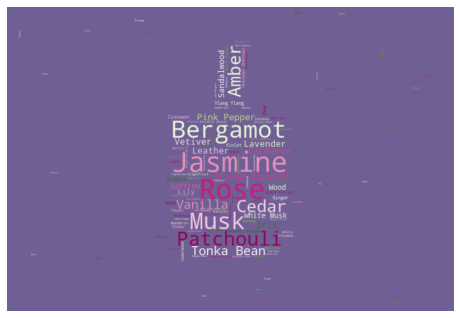

In [ ]:
from IPython.display import Image
Image(filename='image_2.png') 

In [ ]:
df.shape

(4239, 19)

In [ ]:
df.head()

,Name,Price,Description,Rate,Rating_count,image,Brand,Gender,Product_Type,Character_x,Fragrance_Family,Size,Year,Ingredients,Concentration,Top_note,Middle_note,Base_note
0,Dolce & Gabanna L'imperatrice 3 Pour Femme,199,Perfume for the energetic woman who is a hero ...,5,6,https://assets.goldenscent.com/catalog/product...,Dolce&Gabbana,Women,Perfume,Romantic,Floral,100 ml,2009,"watermerlon, kiwi, pink cyclamen, musk, pink p...",Eau de Toilette,"pink pepper, kiwi, rhubarb","jasmine, cyclamen, watermelon","musk, sandalwood, lemon trees."
1,Roberto Cavalli Paradiso,169,"Woody floral fragrance, a subtle aroma that ma...",4.95,17,https://assets.goldenscent.com/catalog/product...,Roberto Cavalli,Women,Perfume,Romantic,Woody,50 ml,2015,"citrus, mandarin, bergamot, jasmine, pine, cyp...",Eau de Parfum,"citruses , mandarin , bergamot",jasmine,"cypress, parasol pine, pink laurel"
2,Yves Saint Laurent Libre,389,"This perfume is a reflection of Freedom, speci...",5,3,https://assets.goldenscent.com/catalog/product...,Yves Saint Laurent,Women,Perfume,Romantic,Floral,90 ml,2019,"mandarin orange, lavendar, black currant, peti...",Eau de Parfum,"mandarin orange, lavendar, black currant, peti...","jasmine, orange blossom","vanilla, cedar, musk, ambergris"
3,Mancera Red Tobacco,499,"Mancera Red Tobacco is the new oriental, woody...",4.38,8,https://assets.goldenscent.com/catalog/product...,Mancera,Women,Perfume,Romantic,Oriental,120 ml,2017,"saffron, cinnamon, incense, nutmeg, white peac...",Eau de Parfum,"saffron, cinnamon, incense, nutmeg, white peac...","patchouli, jasmine","tobacco, amber, woody notes, vetiver, vanilla,..."
4,Giorgio Armani Emporio Armani Stronger With Yo...,399,"for every romantic gentle man, This strong fas...",5,3,https://assets.goldenscent.com/catalog/product...,Giorgio Armani,Men,Perfume,Romantic,Aromatic,100 ml,2019,"spices, violet, lavender, sweet toffee, carame...",Eau de Parfum,"pink pepper, juniper, violet leaf","lavender, sage, toffee, cinnamon","tonka bean, suede, amber, vanilla"


### Recomendations using: 
- Description

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import emoji

# helper function to get the indices
def get_index(Name):
    return df[df.Name == Name].index[0]

def get_title_from_index(index):
    return df[df.index == index]["Name"].values[0]

# fill in any NaNs 
df['Description'].fillna('')

#step1: create recommendation function
def get_recommendations_2(x):
#step2: creat count matrix 
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(df['Description'])

#step3: cosine similarity 
    cosine_sim = cosine_similarity(count_matrix)

#step4: getting the index of the recommended perfume 
    perfume_index = get_index(x)
    similar_perfumes = list(enumerate(cosine_sim[perfume_index]))
    sorted_similar = sorted(similar_perfumes,key=lambda x:x[1],reverse=True)[1:]

    i=0
    print("Top 5 similar Perfumes to "+x+" are:\n")
    for element in sorted_similar:
        print(emoji.emojize(':star:'), get_title_from_index(element[0]), f"  - Similiarity score: ", format(sorted_similar[i][1], ".4f"))
        i=i+1
        if i>=5:
            break

In [ ]:
get_recommendations_2("Yves Saint Laurent Libre")

Top 5 similar Perfumes to Yves Saint Laurent Libre are:

⭐ Lootah Immerse EDP   - Similiarity score:  0.5051
⭐ Paco Rabanne 1 Million Lucky   - Similiarity score:  0.4959
⭐ Abreez Black Gold Hair Mist    - Similiarity score:  0.4929
⭐ Tous Les Jours Perfume Day 39   - Similiarity score:  0.4886
⭐ One Direction That Moment   - Similiarity score:  0.4883


In [ ]:
get_recommendations_2("Dolce & Gabanna L'imperatrice 3 Pour Femme")

Top 5 similar Perfumes to Dolce & Gabanna L'imperatrice 3 Pour Femme are:

⭐ Together Forever Set   - Similiarity score:  0.7247
⭐ Ya Aali Al Hima Set   - Similiarity score:  0.7130
⭐ Ebar Set   - Similiarity score:  0.7130
⭐ Men Mithlak? Set   - Similiarity score:  0.6048
⭐ Sokar Aleyoon Set   - Similiarity score:  0.5524


In [ ]:
get_recommendations_2("Tom Ford Noir Extreme")

Top 5 similar Perfumes to Tom Ford Noir Extreme are:

⭐ Aigner Blue   - Similiarity score:  0.5635
⭐ Calvin Klein CK One Collector's Edition EDT   - Similiarity score:  0.5598
⭐ Calvin Klein CK One Collector's Edition EDT   - Similiarity score:  0.5598
⭐ Kemi Blending Magic Jabir EDP   - Similiarity score:  0.5588
⭐ Van Cleef & Arpels Midnight In Paris   - Similiarity score:  0.5585


Recommending perfume using description is not that useful as the example above all the recomendations are sets that have the perfume we specify in the recommendation function, Thus I will try using other features that is more specific to each perfume such as Ingredients 

### Recomendations using: 
- Gender, Fragrance_Family, Ingredients, Top_note, Middle_note, Base_note

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import emoji

# helper function to get the indices
def get_index(Name):
    return df[df.Name == Name].index[0]

def get_title_from_index(index):
    return df[df.index == index]["Name"].values[0]

def get_price(index):
    return df[df.index == index]["Price"].values[0]


#step1: select features 
features_df = ['Gender','Fragrance_Family','Ingredients','Top_note','Middle_note','Base_note']

for feature in features_df:
    df[feature] = df[feature].fillna('')

#step2: combine features 
def comine_features(row):
    try:
        return row['Gender']+ " "+row['Fragrance_Family'] + " "+row['Ingredients']+" "+row['Ingredients'] + " "+row['Top_note'] + " "+row['Middle_note']+" "+row['Base_note']
    except:
        print("Error:", row)

df['combined_features'] = df.apply(comine_features, axis=1)

#step3: create recommendation function
def get_recommendations(x):
#step4: creat count matrix 
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(df['combined_features'])

#step5: cosine similarity 
    cosine_sim = cosine_similarity(count_matrix)

#step6: getting the index of the recommended perfume 
    perfume_index = get_index(x)
    similar_perfumes = list(enumerate(cosine_sim[perfume_index]))
    sorted_similar = sorted(similar_perfumes,key=lambda x:x[1],reverse=True)[1:]

    i=0
    print("Top 5 similar Perfumes to "+x+" are:\n")
    for element in sorted_similar:
        print(emoji.emojize(':star:'), get_title_from_index(element[0]),f"     -   {get_price(element[0])} SAR    ", f"  - Similiarity score: ", format(sorted_similar[i][1], ".4f"))
        i=i+1
        if i>=5:
            break


In [ ]:
get_recommendations("Yves Saint Laurent Libre")

Top 5 similar Perfumes to Yves Saint Laurent Libre are:

⭐ Tous Les Jours Perfume Day 400   - Similiarity score:  0.8278
⭐ David Kasab Imperial EDP   - Similiarity score:  0.7711
⭐ Korloff Lady Intense   - Similiarity score:  0.6856
⭐ Roberto Cavalli Florence   - Similiarity score:  0.6715
⭐ Guerlain Shalimar Souffle   - Similiarity score:  0.6119


In [ ]:
get_recommendations("Roberto Cavalli Paradiso")

Top 5 similar Perfumes to Roberto Cavalli Paradiso are:

⭐ Tous Les Jours Perfume Day 354   - Similiarity score:  0.7239
⭐ Lootah Rival EDP   - Similiarity score:  0.4913
⭐ Roberto Cavalli Paradiso Azzurro   - Similiarity score:  0.4819
⭐ Kun Safi Amber Safi Perfume Oil    - Similiarity score:  0.4445
⭐ Kun Safi Amber Safi Perfume Oil    - Similiarity score:  0.4445


In [ ]:
get_recommendations("Dolce & Gabbana Pour Femme Intense")

Top 5 similar Perfumes to Dolce & Gabbana Pour Femme Intense are:

⭐ Korloff Lady Intense   - Similiarity score:  0.6143
⭐ Montale Day Dreams   - Similiarity score:  0.6030
⭐ Dolce & Gabbana Pour Femme   - Similiarity score:  0.5658
⭐ Al Dakheel Oud Bushra Cream    - Similiarity score:  0.5562
⭐ Giorgio Armani My Way Intense EDP   - Similiarity score:  0.5525


In [ ]:
get_recommendations("Chopard Happy Spirit")

Top 5 similar Perfumes to Chopard Happy Spirit are:

⭐ Chopard Happy Spirit   - Similiarity score:  1.0000
⭐ Candy Addict Powdery Pow Hair Mist    - Similiarity score:  0.6171
⭐ Candy Addict Powdery Pow EDP    - Similiarity score:  0.6067
⭐ Brands Me Tout Musk EDP   - Similiarity score:  0.5180
⭐ Al Majed for Oud Albiyaa EDP   - Similiarity score:  0.4758


In [ ]:
get_recommendations("Giorgio Armani Emporio Armani Stronger With You Intensely")

Top 5 similar Perfumes to Giorgio Armani Emporio Armani Stronger With You Intensely are:

⭐ Caron Pour Un Homme De Caron Set    - Similiarity score:  0.5022
⭐ Glenn Perri Unbelievable EDT   - Similiarity score:  0.4820
⭐ Simone Andreoli Sentosa EDP   - Similiarity score:  0.4273
⭐ Al Dakheel Oud Amadora EDP   - Similiarity score:  0.4095
⭐ Calvin Klein Obsession for Women   - Similiarity score:  0.4085


In [ ]:
get_recommendations("Mancera Roses Vanille")

Top 5 similar Perfumes to Mancera Roses Vanille are:

⭐ Lootah Musk Al Rose Fragrant Oil   - Similiarity score:  0.5044
⭐ Mancera Amber & Roses   - Similiarity score:  0.4714
⭐ Tous Les Jours Perfume Day 45   - Similiarity score:  0.4636
⭐ Tiziana Terenzi Delox Extrait de Parfum   - Similiarity score:  0.4636
⭐ Givenchy Dahlia Divin Eau Initiale   - Similiarity score:  0.4414


In [ ]:
#price for this 799 SAR 
get_recommendations("Tom Ford Velvet Orchid")

Top 5 similar Perfumes to Tom Ford Velvet Orchid are:

⭐ Tous Les Jours Perfume Day 337      -   119 SAR       - Similiarity score:  0.7042
⭐ Tom Ford Noir Pour Femme      -   537 SAR       - Similiarity score:  0.5854
⭐ Tom Ford Noir Extreme      -   587 SAR       - Similiarity score:  0.5593
⭐ Viktor & Rolf Flower Bomb      -   492 SAR       - Similiarity score:  0.5065
⭐ Giorgio Beverly Hills Gior Gio      -   160 SAR       - Similiarity score:  0.5050


In [8]:
get_recommendations("Yves Saint Laurent Black Opium")

Top 5 similar Perfumes to Yves Saint Laurent Black Opium are:

⭐ Musk Alemarat Ceaser      -   122 SAR       - Similiarity score:  0.6361
⭐ Tous Les Jours Perfume Day 347      -   99 SAR       - Similiarity score:  0.6143
⭐ Lalique Lalique Le Parfum      -   189 SAR       - Similiarity score:  0.5904
⭐ Majda Bekkali J'ai Fait Un Re've Obscur      -   1024 SAR       - Similiarity score:  0.5795
⭐ Van Cleef & Arpels Collection Extraordinaire Bois d'Amande      -   782 SAR       - Similiarity score:  0.5620


### Conclusion
Perfume Recommendation syatem using perfume data scraped from GoldenScent website https://www.goldenscent.com/en/. Firstly, cleaning the dataset and in the phase I faced many issues because data obtained from goldenscent website have a lot of incosistencies and null values that lead to a lot of problems and have to be resolved before starting the building recommender phase. Second phase was exploring the dataset by doing a proper Exploratory Data Analysis. Third phase building the recommender, the approach chosen was content-based similarity recommender based on cosine similarity. This approach was chosen due to the nature of the dataset in hand where there are no enough rating data avaliable in the dataset.

In Conclusion, two recommender was built in order to see which perform better. first recommender was based on perfume description, unfortanatily it did not perform well. the reason is that not all perfume descriptions have a useful information about the perfume not only this some brand have the same description for all their perfumes. second recommender was based on selected features: Gender, Fragrance_Family, Ingredients, Top_note, Middle_note, Base_note. therfore the second recommender perfome better and produce 5 most similar perfumes with high cosine similarity scores.  